## 선형회귀 과제
## 자동차의 특성을 통해 연비 (mpg(miles per gallon)) 예측

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 데이터 불러오기

In [72]:
# 데이터 출처: https://archive.ics.uci.edu/ml/datasets/auto+mpg

col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# 주요 컬럼: 
# mpg: mile per gallon 연비
# horsepower: 마력
# weight: 무게
# origin: 제조국 (1: USA, 2: Europe, 3: Asia)

# comma가 아니라 whitespace로 컬럼 분리, ? 값는 결측치로 처리함
df = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, names=col_names, na_values='?') 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [73]:
df.info() # Null 값 확인(Age, Cabin 컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [75]:
np.sum(df.isna()) # isna함수를 사용하여 horsepower 변수에만 6개의 null값이 있는 것 확인 가능

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

# 2. 데이터의 이해

## 2.1 Null값이 하나라도 들어있는 행 제거 
- 모든 행의 non-null 개수가 같아져야 함
- np.sum(df.isna())을 통해 null이 있는 변수가 없다는 것 확인

In [76]:
df.dropna(inplace=True)

## 2.2 연비(MPG)의 분포는?
- 히스토그램과 Boxplot으로 표현하기 
- 연비가 낮은 차들이 연비가 높은 차들보다 많이 있는 것을 시각적으로 확인할 수 있음

In [77]:
np.sum(df.isna())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Text(0, 0.5, 'Frequency')

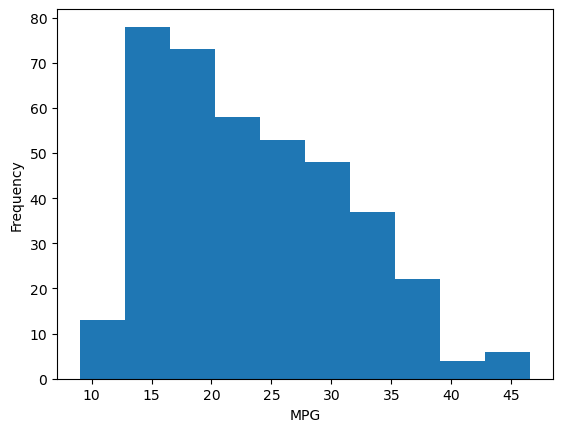

In [78]:
plt.hist(df['mpg'])
plt.xlabel('MPG')
plt.ylabel('Frequency')

Text(0, 0.5, 'MPG')

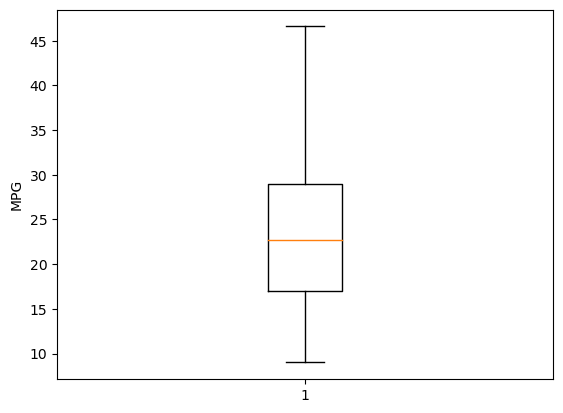

In [79]:
plt.boxplot(df['mpg'])
plt.ylabel('MPG')

## 2.3 제조국(Origin)에 따른 연비 평균은? 
- Origin에서 1: USA, 2: Europe, 3: Asia

In [80]:
mpgs = df.groupby('origin').mean()['mpg']
mpgs

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12952\1291682366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpgs = df.groupby('origin').mean()['mpg']


origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64

Text(0, 0.5, 'MPG (mean)')

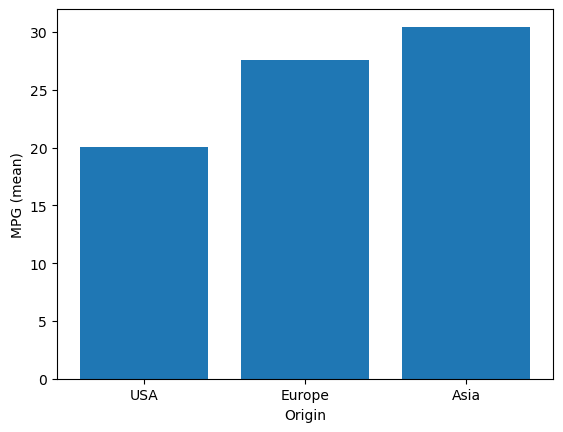

In [81]:
plt.bar(['USA', 'Europe', 'Asia'], mpgs)
plt.xlabel('Origin')
plt.ylabel('MPG (mean)')

## 2.4 차의 무게(Weight)와 연비(MPG)의 관계는?
- Scatter plot과 상관계수 구하기 

Text(0, 0.5, 'MPG')

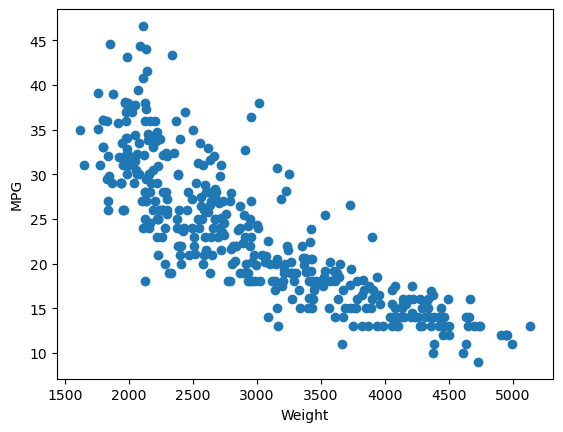

In [82]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')

In [83]:
np.corrcoef(df['weight'], df['mpg'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

## 2.5 마력(Horsepower)과 연비(MPG)의 관계는?
- Scatter plot과 상관계수 구하기 

Text(0, 0.5, 'Weight')

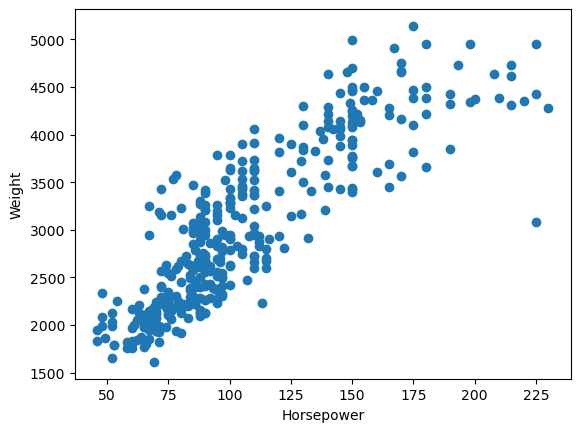

In [84]:
plt.scatter(df['horsepower'], df['weight'])
plt.xlabel('Horsepower')
plt.ylabel('Weight')

In [85]:
np.corrcoef(df['horsepower'], df['weight'])

array([[1.        , 0.86453774],
       [0.86453774, 1.        ]])

# 3. 선형회귀

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 3.1 출시연도("Model Year")와 제조국("Origin")을 One-hot encoding으로 변환

In [87]:
df_enc = pd.get_dummies(df, columns=['model_year', 'origin'])
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    float64
 5   acceleration   392 non-null    float64
 6   car_name       392 non-null    object 
 7   model_year_70  392 non-null    uint8  
 8   model_year_71  392 non-null    uint8  
 9   model_year_72  392 non-null    uint8  
 10  model_year_73  392 non-null    uint8  
 11  model_year_74  392 non-null    uint8  
 12  model_year_75  392 non-null    uint8  
 13  model_year_76  392 non-null    uint8  
 14  model_year_77  392 non-null    uint8  
 15  model_year_78  392 non-null    uint8  
 16  model_year_79  392 non-null    uint8  
 17  model_year_80  392 non-null    uint8  
 18  model_year

## 3.2 Input 데이터(X)와 Target 데이터(y) 분리

In [88]:
# df_enc에서 'car_name'과 'mpg'를 제외한 컬럼들만 X에 대입
# df_enc에서 'mpg'만 y에 대입
X = df_enc[df_enc.columns.difference(['Anonymous Customer ID', 'Churn'])]
y = df_enc['mpg']
X.shape, y.shape
# X.shape, y.shape 출력 결과 아래와 같음

((392, 23), (392,))

## 3.3 Train set 과 Test set으로 분리
- test set에 30%의 데이터 포함 
- X_train, X_test, y_train, y_test로 구분

In [89]:
# test set의 비율을 0.3, random_state=0으로
# X_train.shape, X_test.shape, y_train.shape, y_test.shape <= 결과는 아래와 같음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 23), (118, 23), (274,), (118,))

## 3.4 자동차 무게(Weight)를 통해 연비(MPG) 예측하기 
- 선형회귀 모델 만들기
- MAE와 $R^2$로 평가
- 무게와 연비를 그래프로 표현하고, 선형회귀 예측 결과를 시각화

In [104]:
X_train.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12952\131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,acceleration,cylinders,displacement,horsepower,model_year_70,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,mpg,origin_1,origin_2,origin_3,weight
acceleration,1.000000,-0.490167,-0.514724,-0.672461,-0.228829,-0.122372,-0.044327,-0.166511,0.094445,0.047883,...,0.019272,0.029347,0.130975,0.084489,0.069398,0.390812,-0.213805,0.203012,0.069197,-0.375924
cylinders,-0.490167,1.000000,0.952824,0.839680,0.201326,0.069717,0.049858,0.181678,-0.048745,0.037202,...,0.004343,0.021871,-0.200179,-0.132401,-0.246044,-0.788188,0.600255,-0.340487,-0.406516,0.895298
displacement,-0.514724,0.952824,1.000000,0.887352,0.186422,0.107021,0.064249,0.210770,-0.065377,0.053270,...,-0.031309,0.017889,-0.191736,-0.152271,-0.215703,-0.812281,0.648847,-0.360802,-0.446129,0.927360
horsepower,-0.672461,0.839680,0.887352,1.000000,0.249385,0.060967,0.123098,0.252003,-0.067692,-0.005631,...,-0.014862,-0.044375,-0.170361,-0.167984,-0.185775,-0.770134,0.469633,-0.272716,-0.312205,0.853331
model_year_70,-0.228829,0.201326,0.186422,0.249385,1.000000,-0.076395,-0.068198,-0.094710,-0.068198,-0.076395,...,-0.087670,-0.072381,-0.070313,-0.074407,-0.078348,-0.184273,0.078622,-0.038021,-0.059328,0.078932
model_year_71,-0.122372,0.069717,0.107021,0.060967,-0.076395,1.000000,-0.074098,-0.102903,-0.074098,-0.083004,...,-0.095254,-0.078642,-0.076395,-0.080844,-0.085126,-0.114150,0.075924,-0.053653,-0.041627,0.075154
model_year_72,-0.044327,0.049858,0.064249,0.123098,-0.068198,-0.074098,1.000000,-0.091862,-0.066148,-0.074098,...,-0.085034,-0.070204,-0.068198,-0.072170,-0.075992,-0.151864,0.006423,0.008495,-0.015577,0.092304
model_year_73,-0.166511,0.181678,0.210770,0.252003,-0.094710,-0.102903,-0.091862,1.000000,-0.091862,-0.102903,...,-0.118089,-0.097495,-0.094710,-0.100225,-0.105533,-0.284022,0.079310,0.028261,-0.121464,0.166728
model_year_74,0.094445,-0.048745,-0.065377,-0.067692,-0.068198,-0.074098,-0.066148,-0.091862,1.000000,-0.074098,...,-0.085034,-0.070204,-0.068198,-0.072170,-0.075992,-0.003652,-0.056429,0.008495,0.059965,-0.031459
model_year_75,0.047883,0.037202,0.053270,-0.005631,-0.076395,-0.083004,-0.074098,-0.102903,-0.074098,1.000000,...,-0.095254,-0.078642,-0.076395,-0.080844,-0.085126,-0.128298,0.047426,0.020407,-0.075878,0.107288


In [90]:
reg = LinearRegression().fit(X=X_train[['weight']], y=y_train)
y_pred = reg.predict(X_test[['weight']])

In [91]:
# 아래와 같이 학습됨
print('w_0: ', reg.intercept_)
print('w_1: ', reg.coef_)

w_0:  46.25404117214739
w_1:  [-0.00770724]


In [92]:
# 평가 결과
print('MAE: ', mean_absolute_error(y_test, y_pred),' R_squared: ', r2_score(y_test, y_pred))

MAE:  3.405889347991331  R_squared:  0.6644440345914269


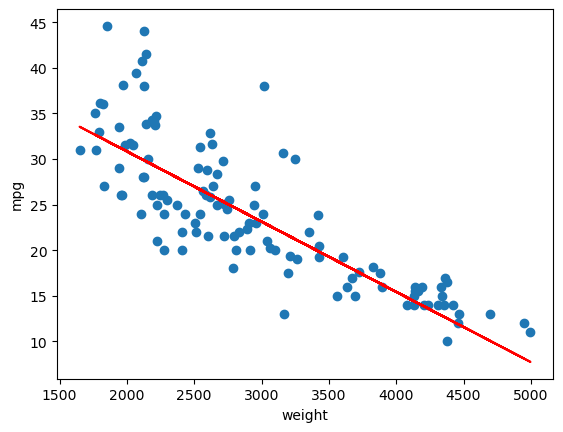

In [93]:
plt.plot(X_test['weight'], y_test, 'o')
plt.plot(X_test['weight'], y_pred, 'r')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

## 3.5 두개 이상의 변수를 사용하여 선형회귀 3.4보다 성능이 좋은 모델 만들기 
- 성능이 좋은 기준: MAE가 더 작고 $R^2$가 더 큼
- MAE와 $R^2$로 평가

['cylinders','displacement','horsepower'] False <br>
['displacement','horsepower'] False  <br>

In [108]:
reg = LinearRegression().fit(X=X_train[['horsepower','weight']], y=y_train)
y_pred = reg.predict(X_test[['horsepower','weight']])

In [109]:
# 모델 학습 결과
print('w_0: ', reg.intercept_)
print('w_1: ', reg.coef_)

# w_0:  45.841847958065685
# w_1:  [-0.04107628 -0.00613322]

w_0:  45.84184795806567
w_1:  [-0.04107628 -0.00613322]


In [110]:
# 3.4보다 성능이 좋은 모델이 나오기만 하면 됨
print('MAE: ', mean_absolute_error(y_test, y_pred),' R_squared: ', r2_score(y_test, y_pred))
# MAE:  3.3330095304607315  R_squared:  0.6834117333600405

MAE:  3.333009530460732  R_squared:  0.6834117333600404


----